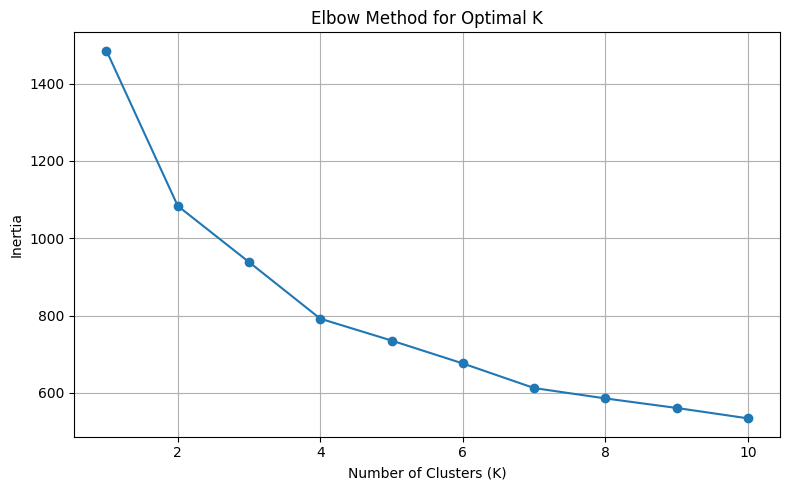

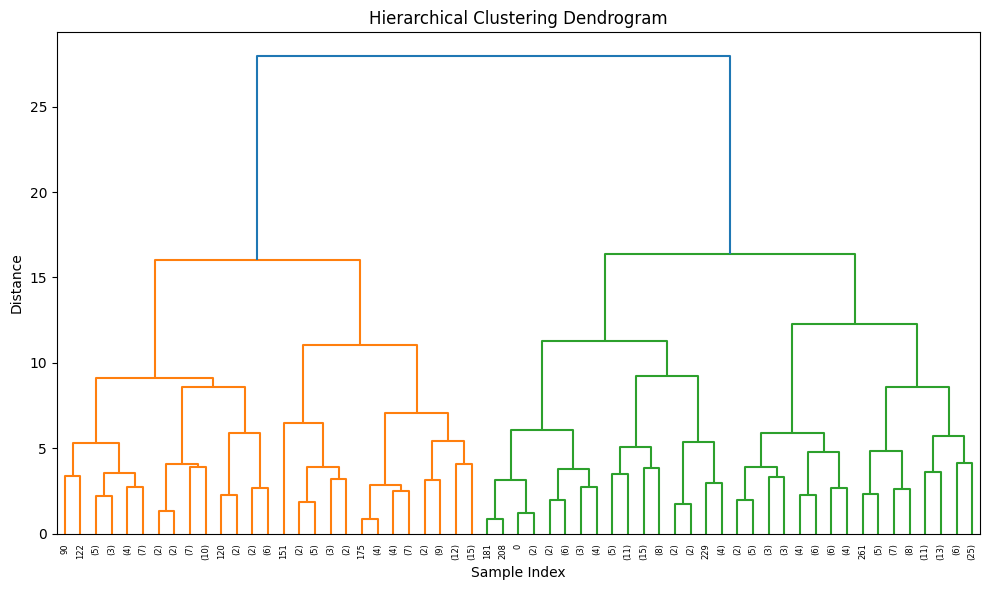

Adjusted Rand Index (KMeans vs Target): 0.312
Adjusted Rand Index (Hierarchical vs Target): 0.313


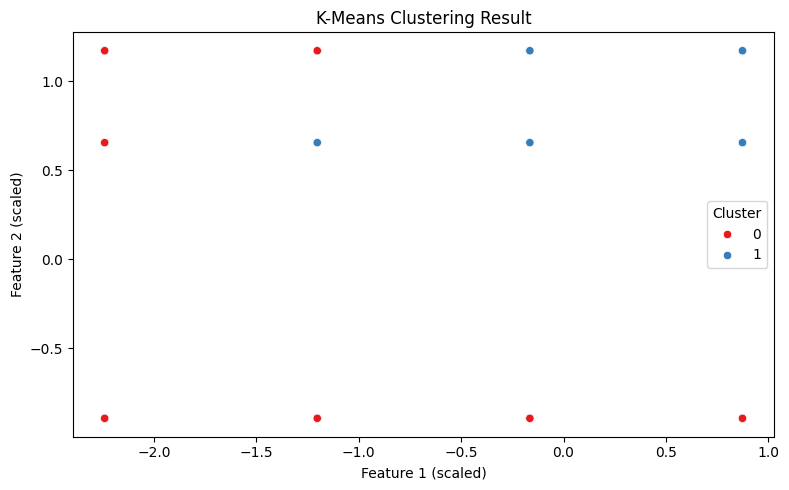

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

df_selected = pd.read_csv("../data/heart_disease_selected_features.csv")

X = df_selected.drop("target", axis=1)
y = df_selected["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K-Means Clustering - Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.tight_layout()
plt.show()

kmeans_final = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters_kmeans = kmeans_final.fit_predict(X_scaled)


# Hierarchical Clustering - Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Apply Agglomerative Clustering with 2 clusters
agg_cluster = AgglomerativeClustering(n_clusters=2)
clusters_hier = agg_cluster.fit_predict(X_scaled)


# Compare clusters with actual labels
kmeans_ari = adjusted_rand_score(y, clusters_kmeans)
hier_ari = adjusted_rand_score(y, clusters_hier)

print(f"Adjusted Rand Index (KMeans vs Target): {kmeans_ari:.3f}")
print(f"Adjusted Rand Index (Hierarchical vs Target): {hier_ari:.3f}")


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters_kmeans, palette="Set1")
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


